# Assignment4-R

# 1 Assignment 4 - Classification

# 1.1 Overview of the steps

1. Load the data and get an overview of the data
2. Perform a logistic regression
3. Use the logistic regression models
4. Perform an LDA
5. Use the LDA regression model
6. Perform an QDA
7. Use the QDA regression model
8. Use $k$-Nearest Neighbors (KNN)

# 1.2 Steps in detail

## 1.2.1 Load the data and get an overview of the data

Load the data file `Smarket.rda` or `Smarket.csv`.

This data set consists of percentage returns for a stock index over 1, 250 days. For each date, it contains the percentage returns for each of the five previous trading days, `Lag1` through `Lag5`. It also contains `Volume` (the number of shares traded on the previous day, in billions), `Today` (the percentage return on the date in question) and `Direction` (whether the market was Up or Down on this date).

In [1]:
import pandas as pd
from IPython.display import display, Markdown
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import statsmodels.api as sm
from statsmodels.formula.api import ols, glm
import scipy
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
default_figsize=(8, 6)
default_alpha = .05
display(Markdown(f'### Significance level: {default_alpha}'))


smarket_df = pd.read_csv('../ISLR/data/Smarket.csv', index_col=0)

/home/bogdan/lnu/4dv660/ml-practice/venv/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


### Significance level: 0.05

Display the number of predictors and possible responses and their names:

In [2]:
print(len(smarket_df.columns))
print(smarket_df.columns)

9
Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')


Print a statistic summary of the predictors and responses:

In [3]:
smarket_df.describe(include='all')

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Up
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,648
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138,NaN
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334,NaN
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000,NaN
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500,NaN
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500,NaN
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750,NaN


In [4]:
len(smarket_df)

1250

Display the data in a table:
> Top 20 rows are shown.

In [5]:
n = 20
display(smarket_df.info(verbose=True))
display(smarket_df.head(n))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 1 to 1250
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Today      1250 non-null   float64
 8   Direction  1250 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 97.7+ KB


None

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
6,2001,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up
7,2001,1.392,0.213,0.614,-0.623,1.032,1.4450,-0.403,Down
8,2001,-0.403,1.392,0.213,0.614,-0.623,1.4078,0.027,Up
9,2001,0.027,-0.403,1.392,0.213,0.614,1.1640,1.303,Up
10,2001,1.303,0.027,-0.403,1.392,0.213,1.2326,0.287,Up


### Compute the pairwise correlation of the predictors in the data set.

In [6]:
def corrmat(df, ylab, render=display):
    """Does not do symbol-coded chart."""
    def pearsonr_pval(x,y):
        return scipy.stats.pearsonr(x,y)[1]
    df = df.drop(ylab, axis=1)
    render(Markdown('Pearson:'))
    corr = df.corr(method='pearson')
    render(corr)
    render(Markdown('P values:'))
    render(df.corr(method=pearsonr_pval))
    render(Markdown('Pearson (chart):'))
    fig, ax = plt.subplots(figsize=default_figsize)
    sns.heatmap(corr.round(2), ax=ax, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
    fig.show()

Pearson:

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


P values:

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000e+00,0.294076,0.279734,0.240894,0.207336,0.292642,4.026439e-95,0.287690
Lag1,2.940759e-01,1.000000,0.352954,0.702768,0.916009,0.841145,1.483058e-01,0.355511
Lag2,2.797337e-01,0.352954,1.000000,0.360285,0.701455,0.899995,1.252720e-01,0.717322
Lag3,2.408942e-01,0.702768,0.360285,1.000000,0.395545,0.506454,1.394458e-01,0.931108
Lag4,2.073355e-01,0.916009,0.701455,0.395545,1.000000,0.338684,8.708241e-02,0.807468
Lag5,2.926415e-01,0.841145,0.899995,0.506454,0.338684,1.000000,4.370319e-01,0.218087
Volume,4.026439e-95,0.148306,0.125272,0.139446,0.087082,0.437032,1.000000e+00,0.606266
Today,2.876898e-01,0.355511,0.717322,0.931108,0.807468,0.218087,6.062664e-01,1.000000


Pearson (chart):

<IPython.core.display.Javascript object>


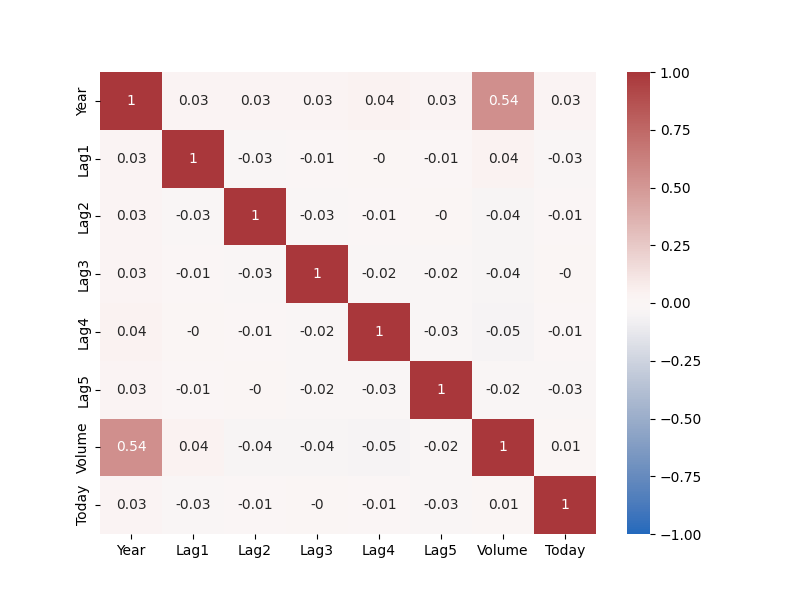

In [7]:
corrmat(smarket_df, 'Direction')

### Interpret the results.

Only `Volume` and `Year` have correlation of 0.54. Other variables have very weak, close to 0, correlation Pearson's $r$ values.

This is confirmed by Pearson $r$ values' $p-values$: for non-correlated and very weakly correlated variables the $p-values$ are high, which means that similar results could have been observed if no correlation was present. Since the Pearson $r$ values are close to 0, meaning there is a weak correlation, we can consider $p-values$ proving this point.

## Plot the correlated predictors `Volume` and `Year`.

In [8]:
def fit_lr(x, y):
    X = sm.add_constant(x)
    return sm.OLS(y, X).fit()

def plot(x, y, xlab, ylab, mod_fit=None, alpha=default_alpha):
    fig, ax = plt.subplots(figsize=default_figsize)
    ax.plot(x, y, 'yo')
    if mod_fit:
        X = sm.add_constant(x)
        regr = mod_fit.predict(X)
        ax.plot(x, regr, 'k')
        prediction = mod_fit.get_prediction(X)
        frame = prediction.summary_frame(alpha=alpha)
        zipped = pd.concat([x, frame.mean_ci_lower, frame.mean_ci_upper], axis=1)
        zipped.sort_values(x.name, inplace=True)
        ax.fill_between(zipped[x.name], zipped[frame.mean_ci_lower.name], zipped[frame.mean_ci_upper.name], color='k', alpha=.3)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    fig.show()

def format_pearsonr(values):
    return f'R = {values[0]}, p < {values[1]}'

def fit_lr_plot_full(x, y, xlab, ylab):
    mod_fit = fit_lr(x, y)
    print(format_pearsonr(scipy.stats.pearsonr(x, y)))
    plot(x, y, xlab, ylab, mod_fit)
    return mod_fit

R = 0.5390064661397254, p < 4.026438946561965e-95


<IPython.core.display.Javascript object>


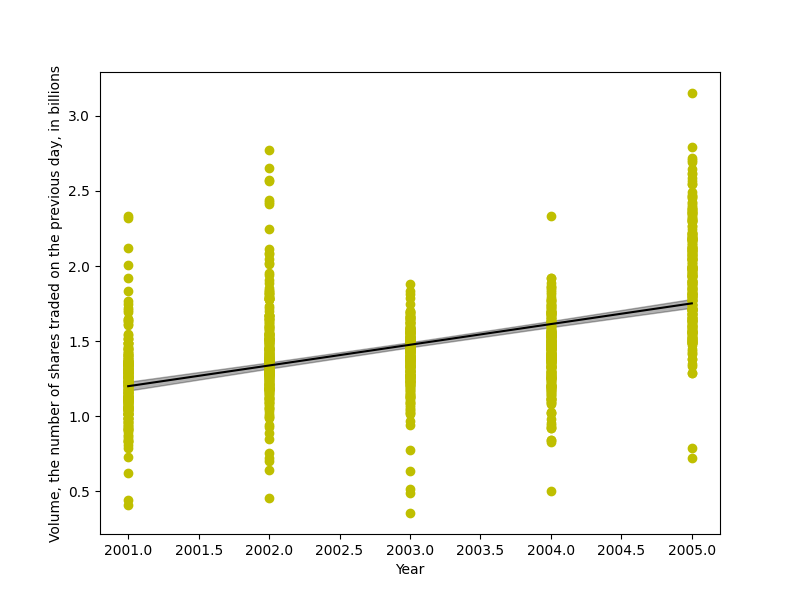

In [9]:
fit_lr_plot_full(smarket_df['Year'], smarket_df['Volume'], xlab='Year', ylab='Volume, the number of shares traded on the previous day, in billions')

## Interpret the results.

The chart plots `Year` along the $x$ axis and "_Volume, the number of shares traded on the previous day, in billions_", short as `Volume`, along the $y$ axis. Also, the least squares linear regression of `Volume` against `Year` together with mean confidence interval are performed and charted.

`Year` can be considered a categorical, non-continuous, but ordered (ascending) variable, because it is a time variable. This means that the `Volume` values will be shown in vertical "columns" on the chart. This combination of $y$ vs $x$ is not optimal for linear regression since the results will be impaired due to non-continuous $x$.

However, it is obvious from the chart that there is a correlation between these to variables, and it is obvious from the data that the regression line is indeed ascending. Moreover, the confidence intervals are rather small meaning relatively high confidence in the regression results.

Pearson's correlation coefficient $r$ is not large partially due to `Year` being categorical data, but it is large enough to confirm that there is a correlation. $p-value$ of the $r$ is small, confirming that it is unlikely to get such results if there is no actual correlation.

**Conclusion**: There is a considerable correlation between `Year` and `Volume`.

# 1.2.2 Perform logistic regressions

Fit a logistic regression model in order to predict `Direction` using `Lag1` through `Lag5` and `Volume`.

In [10]:
def print_lm(mod_fit):
    print(mod_fit.summary())

In [11]:
encoding_matrix = {'Down': '1', 'Up': '0'} # TODO: connect the matrix to the model.
inversed_em = {int(v): k for k, v in encoding_matrix.items()}
full_mod_fit = glm('Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume', smarket_df, family=sm.families.Binomial()).fit()
print_lm(full_mod_fit)

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1243
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    Logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -863.79
Date:                                  Mon, 04 Apr 2022   Deviance:                       1727.6
Time:                                          23:59:14   Pearson chi2:                 1.25e+03
No. Iterations:                                       4   Pseudo R-squ. (CS):           0.002868
Covariance Type:                              nonrobust                                         
                 coef    std e

> The sign for each coefficient is opposite to the assignment's coefficients because the order (0 and 1) of values of `Direction` is different.
> As far as I understand it can be fixed using `contrast = [ .... ] ` matrix and `C(Direction, contrast)` instead of `Direction` in the `glm` formula. `patsy` would use the contrast matrix to do the job.
## Interpret the results.

The standard errors are not large in comparison to coefficient estimates, which means the results are reliable if the regression is rerun with different data. However, the $p-value$ for $z$ are large which means the independent variables are insignificant (do not describe the dependent variable very well).

# 1.2.3 Use the logistic regression models
## Predict the probability that the market will go up, given values of the predictors.
> 1 - probability is used to conform to the assignment's numbers since the 0 and 1 are inverted in the model.

In [12]:
mod_probs = 1 - full_mod_fit.predict(smarket_df)
mod_probs[:10]

1     0.507084
2     0.481468
3     0.481139
4     0.515222
5     0.510781
6     0.506956
7     0.492651
8     0.509229
9     0.517614
10    0.488838
dtype: float64

These values correspond to the probability of the market going up rather than down

In [13]:
def lm_probs_to_levels(probs, inversed_encoding_map, column_name):
    return pd.DataFrame({ column_name: probs.map(lambda p: inversed_encoding_map[0] if p > .5 else inversed_encoding_map[1]) })

In [14]:
display(pd.DataFrame(encoding_matrix, index=['']))

mod_pred = lm_probs_to_levels(mod_probs, inversed_em, 'Direction')

,Down,Up
,1,0


In [15]:
def crosstable(levels, actual, predicted, first_i=0):
    d = {}
    for level in levels:
        d[level] = {}
    for row in d.values():
        for level in d.keys():
            row[level] = 0
    for i in range(first_i, len(actual)+first_i):
        d[actual[i]][predicted[i]] += 1
    return d

def crosstable_df(levels, actual, predicted, first_i=0):
    d = crosstable(levels, actual, predicted, first_i)
    df = pd.DataFrame(d)
    df.index.set_names('Actual', inplace=True)
    return df

In [16]:
display(crosstable_df(encoding_matrix.keys(), smarket_df['Direction'], mod_pred['Direction'], first_i=1))
display(Markdown('#### Mean: ' + str((smarket_df['Direction'] == mod_pred['Direction']).mean())))

,Down,Up
Actual,,
Down,145,141
Up,457,507


#### Mean: 0.5216

## Interpret the results.

The precision of the model is not very high. It can be seen that for `Up` values the model is imprecise. This is confirmed by the mean calculation, which is around 0.5. The mean shows how what is the relation of correct guesses to all the values for the training data.

## Recall the low `p` values of the predictors. Check if a subset of predictors gives better results
> But the `p` values of the predictors are high, some of them are closer to 1 than 0.

In [17]:
some_mod_fit = glm('Direction~Lag1+Lag2', smarket_df, family=sm.families.Binomial()).fit()
mod_probs = 1 - some_mod_fit.predict(smarket_df)
mod_pred = lm_probs_to_levels(mod_probs, inversed_em, 'Direction')
display(crosstable_df(encoding_matrix.keys(), smarket_df['Direction'], mod_pred['Direction'], first_i=1))
display(Markdown('#### Mean: ' + str((smarket_df['Direction'] == mod_pred['Direction']).mean())))

,Down,Up
Actual,,
Down,114,102
Up,488,546


#### Mean: 0.528

In [18]:
print_lm(some_mod_fit)

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1247
Model Family:                                  Binomial   Df Model:                            2
Link Function:                                    Logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -864.20
Date:                                  Mon, 04 Apr 2022   Deviance:                       1728.4
Time:                                          23:59:14   Pearson chi2:                 1.25e+03
No. Iterations:                                       4   Pseudo R-squ. (CS):           0.002215
Covariance Type:                              nonrobust                                         
                 coef    std e

## Interpret the results.

The `p-value` for predictors went down, but the general result did not change. The mean (the relation of correct guesses to all values) almost did not increase as well as the cross table of the actual data versus prediction results.

# 1.2.4 Perform an LDA
## Now perform an LDA on the `Smarket` data and analyze the result.

In [19]:
def print_da(da, x_labels=None):
    """Print Discriminant Analysis."""
    classes = da.classes_
    df = pd.DataFrame(da.priors_)
    df.set_index(classes, inplace=True)
    display(Markdown('_Prior probabilities of groups_:'), df)
    df = pd.DataFrame(da.means_)
    df.set_index(classes, inplace=True)
    if x_labels:
        df.rename(columns=lambda i: x_labels[i], inplace=True)
    # priors.rename(columns=lambda i: classes[i], inplace=True)
    display(Markdown('_Group means_:'), df)
    if hasattr(da, 'coef_'):
        df = pd.DataFrame(da.coef_)
        if x_labels:
            df.rename(columns=lambda i: x_labels[i], inplace=True)
        display(Markdown('_Coefficients of linear discriminants_:'), df)

def density_plot(df):
    fig, ax = plt.subplots(figsize=default_figsize)
    df.plot.density(ax=ax)
    fig.show()

_Prior probabilities of groups_:

,0
Down,0.4816
Up,0.5184


_Group means_:

,Lag1,Lag2
Down,0.050686,0.032297
Up,-0.039691,-0.022444


_Coefficients of linear discriminants_:

,Lag1,Lag2
0,-0.071261,-0.044332


<IPython.core.display.Javascript object>


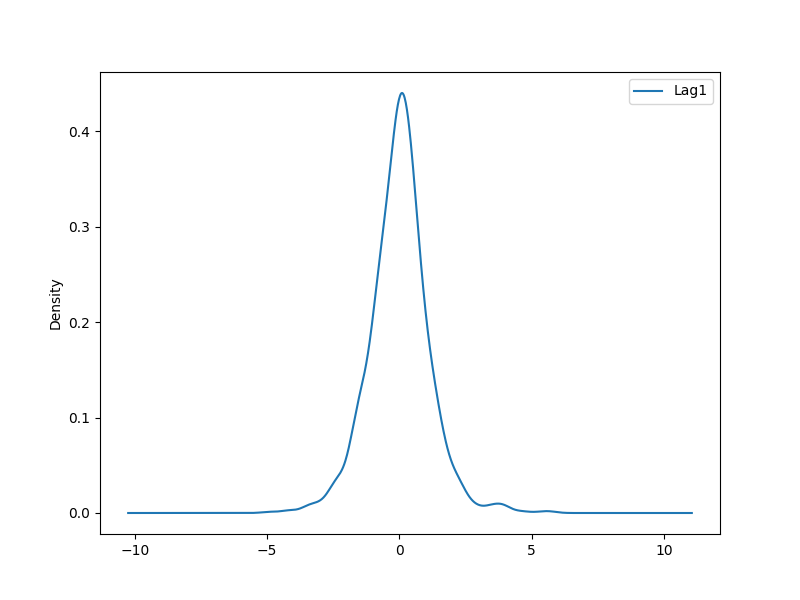

<IPython.core.display.Javascript object>


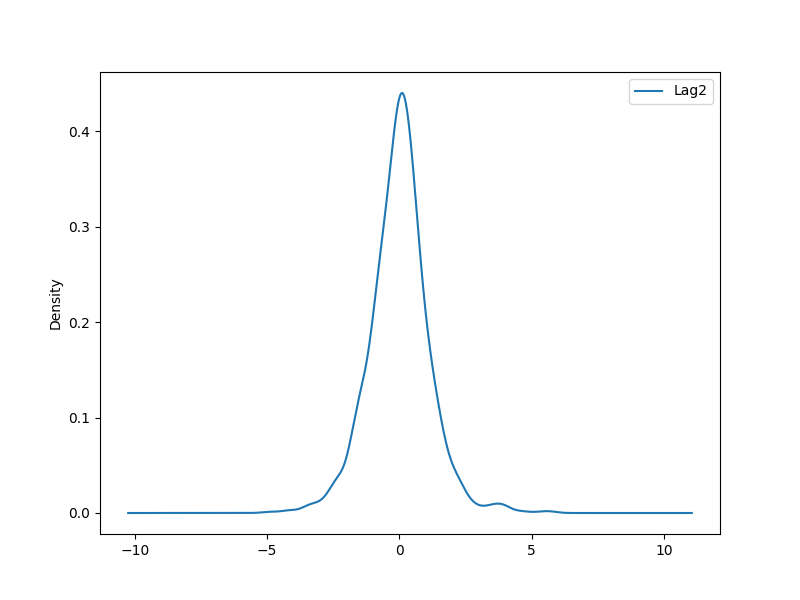

In [20]:
lda = LinearDiscriminantAnalysis()
x_labels = ['Lag1', 'Lag2']
y_label = 'Direction'
lda.fit(smarket_df[x_labels], smarket_df[y_label])
print_da(lda, x_labels)
for label in x_labels:
    density_plot(smarket_df[[label]])

## Interpret the results.
The prior probability of all levels is around 50%, which is generally a good sign of a balanced dataset.

However, it is hard to distinguish the `Up` and `Down` groups because:
1. Group centroids (group means) are all around 0 and are almost equal;
2. The density charts for both variables `Lag1` and `Lag2` are normally distributed around 0 with a seemingly similar standard deviation. This means that the two groups are very close and are hard to distinguish;

**Conclusion**: the model does not seem very precise.

# 1.2.5 Use the LDA model
## Predict the Direction as a response for the selected predictor values using the trained LDA model.

In [21]:
lda_pred = lda.predict(smarket_df[x_labels])

## Compute a confusion matrix.

In [22]:
display(crosstable_df(lda.classes_, smarket_df['Direction'].array, lda_pred))
display(Markdown('#### Mean: ' + str((smarket_df['Direction'] == lda_pred).mean())))

,Down,Up
Actual,,
Down,114,102
Up,488,546


#### Mean: 0.528

## Interpret the results.

As expected earlier, there is a large amount of mistakes (more false `Up`, less `Down`). This is further confirmed by the mean value (the relation of correct guesses to all values), which is a little higher than 50%.

**Conclusion:** the Linear Discriminant Analysis cannot reliably predict values in this case.

# 1.2.6 Perform a QDA
## Now perform a QDA on the `Smarket` data and analyze the result.

_Prior probabilities of groups_:

,0
Down,0.4816
Up,0.5184


_Group means_:

,Lag1,Lag2
Down,0.050686,0.032297
Up,-0.039691,-0.022444


<IPython.core.display.Javascript object>


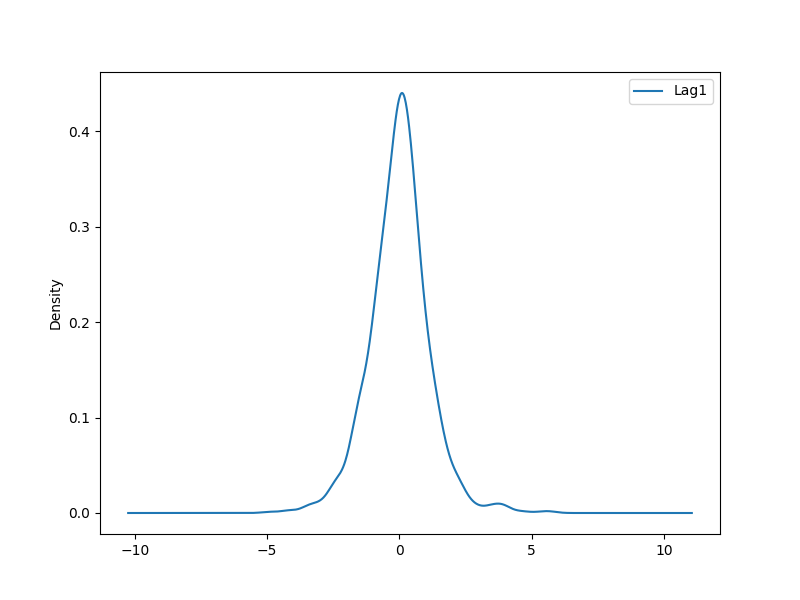

<IPython.core.display.Javascript object>


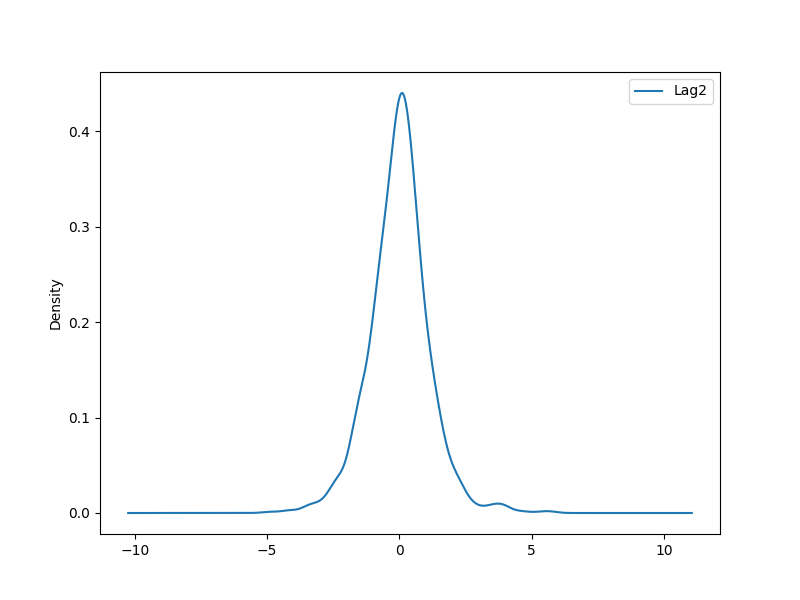

In [23]:
qda = QuadraticDiscriminantAnalysis()
x_labels = ['Lag1', 'Lag2']
y_label = 'Direction'
qda.fit(smarket_df[x_labels], smarket_df[y_label])
print_da(qda, x_labels)
for label in x_labels:
    density_plot(smarket_df[[label]])

## Interpret the results.

Both LDA and QDA examples can be described with an R formula `Direction~Lag1+Lag2`. Group means and density charts are similar for both examples because they are based solely on data. The conclusion is that both `Up` and `Down` cases are difficult to distinguish.

**Conclusion**: the Quadratic Discriminant Analysis model does not look very promising.

# 1.2.7 Use the QDA model
## Predict the `Direction` as a response for the selected predictor values using the trained QDA model. Compute and analyze a confusion matrix.

In [24]:
qda_pred = qda.predict(smarket_df[x_labels])
display(crosstable_df(qda.classes_, smarket_df['Direction'].array, qda_pred))
display(Markdown('#### Mean: ' + str((smarket_df['Direction'] == qda_pred).mean())))

,Down,Up
Actual,,
Down,109,94
Up,493,554


#### Mean: 0.5304

## Interpret the results.

Similar to the LDA model, there are a lot of false positives for `Up`. The mean (relation between the correctly predicted to all predictions) is slightly higher, but it is still close to 50%.

**Conclusion**: the Quadratic Discriminant Analysis model is not precise for the given dataset and variables.

# 1.2.8 Use $K$-Nearest Neighbors Clustering
## Create a training data set used to fined the $k$ nearest neighbors of a data point and their actual
classes.

In [25]:
df_train_filter = smarket_df['Year'] < 2005
smarket2005_df = smarket_df[~df_train_filter]
smarket2005_df.shape

(252, 9)

In [26]:
train_x = smarket_df.loc[df_train_filter, ['Lag1', 'Lag2']]
test_x = smarket_df.loc[~df_train_filter, ['Lag1', 'Lag2']]
train_y = smarket_df.loc[df_train_filter, 'Direction']
test_y = smarket_df.loc[~df_train_filter, 'Direction']

## Use and analyze KNN for $k = 1$.

> Not sure how to set random seed in `sklearn` for `KNeighborsClassifier`. I can only do `np.random.seed(1)`, but I do not know if it is related.

In [27]:
np.random.seed(1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_x, train_y)
knn_pred = knn.predict(test_x)
display(crosstable_df(knn.classes_, test_y.array, knn_pred))
display(Markdown('#### Mean: ' + str((test_y == knn_pred).mean())))

,Down,Up
Actual,,
Down,43,58
Up,68,83


#### Mean: 0.5

## Use and analyze KNN for $k = 3$.

In [28]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_x, train_y)
knn_pred = knn.predict(test_x)
display(crosstable_df(knn.classes_, test_y.array, knn_pred))
display(Markdown('#### Mean: ' + str((test_y == knn_pred).mean())))

,Down,Up
Actual,,
Down,48,55
Up,63,86


#### Mean: 0.5317460317460317

## Interpret the results.

The general results are only slightly better than in LDA and QDA models:
- there are still a lot of prediction errors for both `Down` and `Up`; the general trend is the same (`Down` prediction is less precise), but the relation of errors to correct predictions is much better in KNN model (e.g. for `Down` in KNN for 3 neighbours it is 63/48, in QDA 493/109);
- the mean (the relation of correct predictions to all predictions) is still around 50%. The mean value for KNN for 3 neighbours is slightly better than in LDA and QDA models, while KNN model with 1 neighbour is worse than LDA and QDA models;

Another important difference is that both KNN models split the initial dataset into training and testing datasets.

**Conclusion**: The $K$-Nearest Neighbours algorithm for 3 neighbours is slightly better than both LDA and QDA models, while the KNN algorithm with 1 neighbour is on-par with LDA and QDA models (the crosstables are better, while the mean is worse).

**P.S.** It has to be noticed that the data split into training and test datasets might not be unbiased. The semantic comparison was used for the split: the data before 2005 is for training, while the data after 2005 (including) is for testing. This might be wrong because the data after 2005 might have different dependencies and laws. So, both trained KNN modes might be underfit for this training set.

It is better to pick the data for both training and test set randomly. That is why, as a mitigation a `train_test_split()` function from `sklearn` package could be used.